# 1 Получение данных

In [1]:
#импрот необходимых библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#чтение файла с данными с сохранением в df
df = pd.read_csv(r"games.csv")

In [3]:
#Выведем первые 10 строк таблицы
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# 2 Предобработка данных

In [5]:
# приведение название столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
#изменим тип данных в столбце год 
df['year_of_release'] = df.year_of_release.astype('Int64')

In [7]:
# получение суммарного количества дубликатов
df.duplicated().sum()

0

In [8]:
#суммарное количество пропусков
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Обработка пропусков в столбце name

In [9]:
# отбираем строки с пропусками данных в столбце name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# удаляем строки с пропусками данных в столбце name 
# сброс индексов
df = df.dropna(subset=['name']).reset_index(drop=True)

Обработка пропусков в стобце year_of_release

In [11]:
# отбираем строки с пропусками данных в столбце year_of_release 
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
idx_year = {}  # создаем пустой словарь

# итерируемся по строкам с отсутствием информации о годе
for row in df[df['year_of_release'].isna()].itertuples():
    for item in row.name.split(' '):  # разделяем название игры на отдельные слова
        if item == row.name.split(' ')[-1]:  # берем последнее слово из списка
            try:  # если последнее слово является числом то
                if len(item) == 2 or len(item) == 4: # проверяем его "длину"
                    item = int(item)  # преобразовываем тип данных
                    if item < 21:  # приводим года этого века к полной дате
                        item += 2000
                    elif item > 80 and item < 100: # приводим года прошлого века к полной дате
                        item += 1900
                    if item >= 1980:  # 1980 -- минимальное значение года в наших данных
                        idx_year[row.Index] = item
            except:  # если последнее слово не является числом то продолжаем итерировать по строкам
                continue
            
            
# проверяем выводом на экран получившийся словарь
for key, value in idx_year.items():
    print(f'index: {key: <5} | year:{value: >5}')

index: 183   | year: 2004
index: 377   | year: 2004
index: 475   | year: 2006
index: 1300  | year: 1999
index: 1649  | year: 2003
index: 2478  | year: 2007
index: 2848  | year: 2011
index: 3412  | year: 2006
index: 3485  | year: 2002
index: 4204  | year: 2007
index: 4774  | year: 2003
index: 5155  | year: 2003
index: 5654  | year: 2005
index: 5888  | year: 2003
index: 8917  | year: 2005
index: 13194 | year: 2011
index: 13928 | year: 2006
index: 15951 | year: 2008
index: 16077 | year: 2007
index: 16371 | year: 2008


In [13]:
# итерирумся по словарю и производим замену
for key, v in idx_year.items():
    df.loc[key, 'year_of_release'] = v

# отбираем строки с пропусками данных в столбце year_of_release 
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16346,Agarest Senki: Re-appearance,PS3,<NA>,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
# удаляем строки с пропусками данных в столбце year_of_release 
# делаем сброс индексов
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

# проверяем суммарное количество пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating             6682
dtype: int64

Обработка пропусков данных в столбце 'user_score'

In [15]:
df.user_score.value_counts()

tbd    2378
7.8     322
8       285
8.2     277
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [16]:
# производим замену 'tbd' на NaN
df = df.replace('tbd', np.nan)
# меняем тип данных в столбце user_score
df['user_score'] = df.user_score.astype('float64')

In [17]:
# проверяем суммарное количество пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating             6682
dtype: int64

Обработка пропусков данных в столбце 'rating'

In [18]:
# замена пропущенных значений в столбце 'rating' на строку 'unknown' 
df['rating'] = df['rating'].fillna('unknown')


# <проверка: вычисление суммарного количества пропусков, выявленных в таблице df>
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating                0
dtype: int64

Создадим столбец global_sales

In [19]:
# суммируем продажи по регионам в новый столбец global_sales
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16460,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16461,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16462,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


# 3 Анализ данных

Выпуск игр по годам

In [20]:
# группировка данных и подсчет количества выпущенных игр по годам
games_per_year = df.groupby('year_of_release', as_index=False).name \
                   .count() \
                   .rename(columns={'name': 'games_number'})

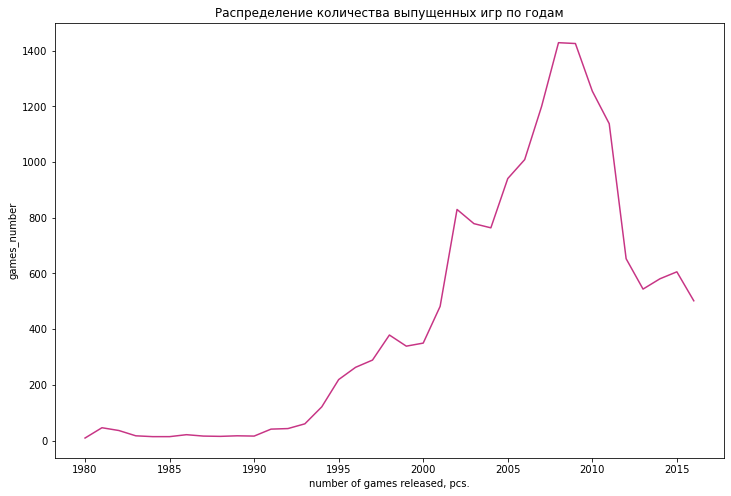

In [21]:
# размер фигуры
plt.figure(figsize=(12, 8))

sns.lineplot(x=games_per_year.year_of_release,
             y=games_per_year.games_number,
             legend='full',
             color='#C73585'
            );

# задание подписи оси у
plt.xlabel('number of games released, pcs.');
plt.title('Распределение количества выпущенных игр по годам');


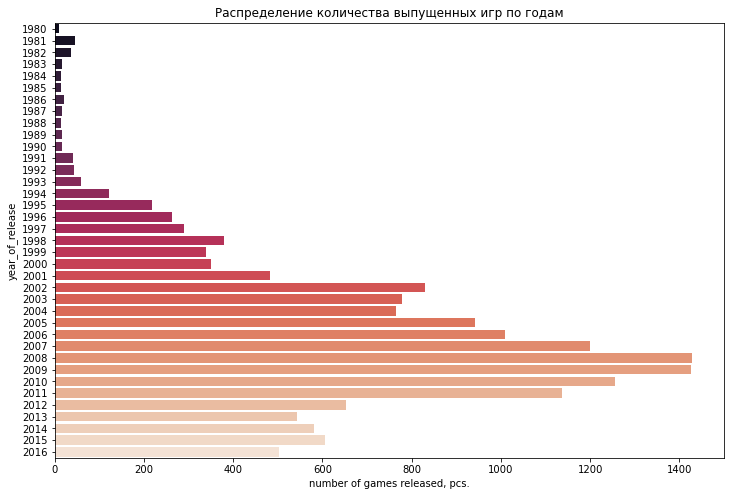

In [22]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=games_per_year.year_of_release,
                 x=games_per_year.games_number,
                 orient='h',
                 palette= "rocket"
                 );

# подписи осей и названия
plt.xlabel('number of games released, pcs.')
plt.title('Распределение количества выпущенных игр по годам');

Изменение продаж по платформам

In [23]:
# подсчет продаж с группировкой по платформам
plt_sales = df.groupby('platform', as_index=False).agg({'global_sales': 'sum'}) \
    .sort_values('global_sales', ascending=False)


<Figure size 864x576 with 0 Axes>

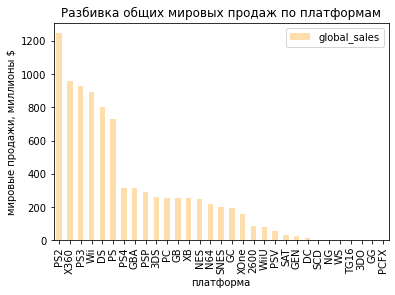

In [24]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
plt_sales.plot(x='platform',
               y='global_sales',
               kind='bar',
               title='Разбивка общих мировых продаж по платформам',
               color = '#FFDEAD'
              );

# задание подписи оси у и x
plt.ylabel('мировые продажи, миллионы $');
plt.xlabel('платформа');

Динамика популярности платформ по годам

In [25]:
# создадим список названий платформ с общими мировыми продажами больше медианного значения
platforms_above_median = []

for row in plt_sales.itertuples():  # итерируемся по датафрейму
    if row.global_sales > plt_sales.global_sales.median():  # сравниваем значения продаж с медианой
        platforms_above_median.append(row.platform)  # добавляем название платформы в список

# проверка результата (вывод списка названий платформ)
platforms_above_median

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'PC',
 'GB',
 'XB',
 'NES',
 'N64']

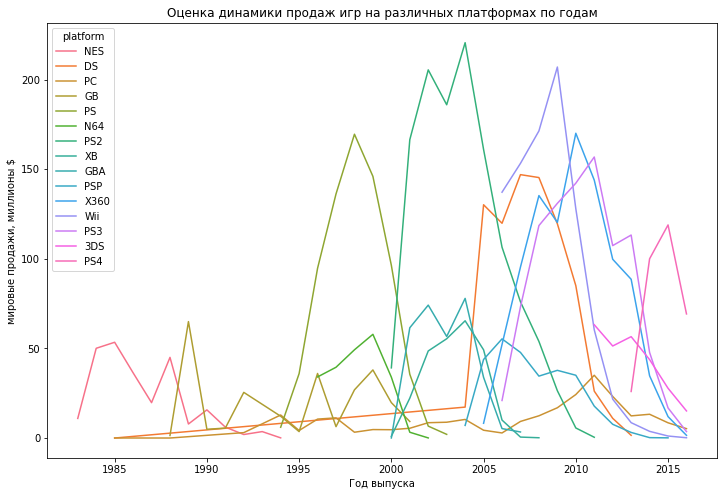

In [26]:
# группировка данных по годам и платформам и подсчет суммарных мировых продаж
plt_sales_year = df.query('platform in @platforms_above_median') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True)
# размер фигуры
plt.figure(figsize=(12, 8))

# параметры графика
sns.lineplot(x=plt_sales_year.year_of_release,
             y=plt_sales_year.global_sales,
             hue=plt_sales_year.platform);

# задание подписи оси у
plt.ylabel('мировые продажи, миллионы $');
plt.xlabel('Год выпуска');
plt.title('Оценка динамики продаж игр на различных платформах по годам');

График распределения жизненного цикла платформ

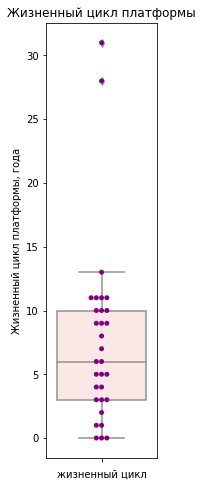

In [27]:
# вычисляем продолжительность жизни платформы
life_span = df.groupby('platform').year_of_release.max() - df.groupby('platform').year_of_release.min()

# размечаем пространство для вывода графиков
fig, (ax1) = plt.subplots(
    nrows=1, ncols=1,
    figsize=(2, 8)
)

# построение и оформление графика (боксплот + точки значений (swarmplot))
sns.boxplot(y=life_span, color='#FFE4E1', ax=ax1)
sns.swarmplot(y=life_span, color='#800080')

# подписи осей и  название графика
ax1.set_title('Жизненный цикл платформы')
ax1.set_xlabel('жизненный цикл')
ax1.set_ylabel('Жизненный цикл платформы, года');

In [28]:
# основные статистики продолжительности жизненного цикла платформ
life_span.describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: year_of_release, dtype: float64

In [29]:
# группировка данных платформ за последние 5 лет по годам и платформам и подсчет суммарных мировых продаж
plt_sales_5year = df.groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True) \
    .query('year_of_release > 2011') 

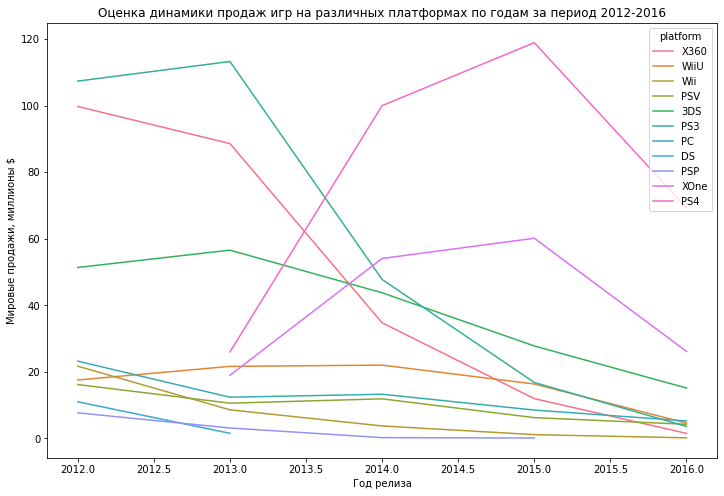

In [30]:
# размер фигуры
plt.figure(figsize=(12, 8))

# параметры графика
sns.lineplot(x=plt_sales_5year.year_of_release,
             y=plt_sales_5year.global_sales,
             hue=plt_sales_5year.platform,
             legend='full',
             palette='husl');
            
            

# задание подписи оси у
plt.ylabel('Мировые продажи, миллионы $');
plt.xlabel('Год релиза');
plt.title('Оценка динамики продаж игр на различных платформах по годам за период 2012-2016');

# 4 Портрет пользователей


In [31]:
# отбираем данные за последние пять лет
df_4 = df[df['year_of_release'] > 2011].reset_index(drop=True)

Определим популярность платформ по регионам.

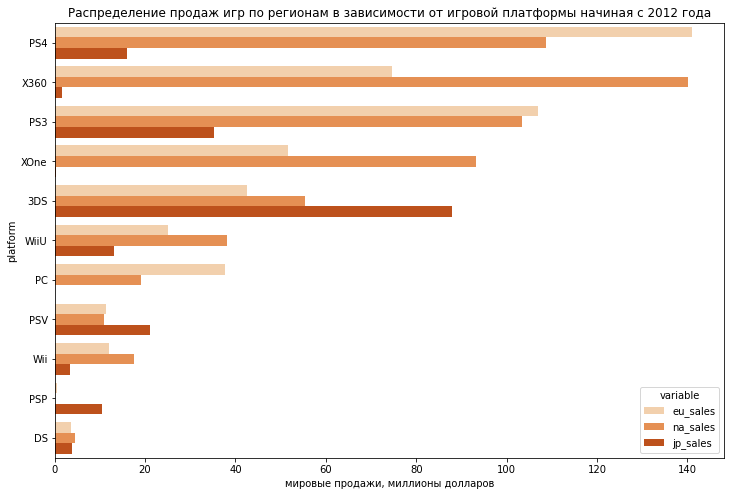

In [32]:
# получаем необходимый срез данных
df_4_region = df_4[['platform', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('platform', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['platform']) \
    .sort_values('value', ascending=False)
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=df_4_region.platform,
                 x=df_4_region.value,
                 orient='h',
                 palette='Oranges',
                 hue=df_4_region.variable);

# подписи осей и названия
plt.xlabel('мировые продажи, миллионы долларов')
plt.title('Распределение продаж игр по регионам в зависимости от игровой платформы начиная с 2012 года');

Определим самые популярные жанры игр по регионам.

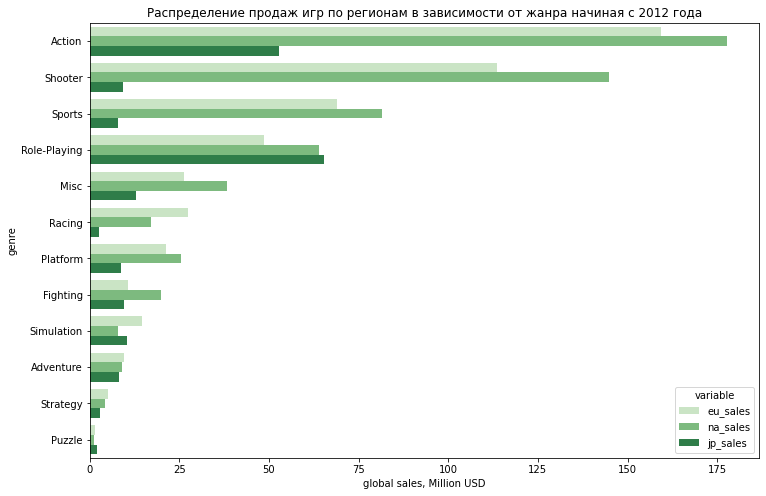

In [33]:
# получаем необходимый срез данных
df_4_genre = df_4[['genre', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('genre', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)
# размер фигуры
plt.figure(figsize=(12, 8))


# задание параметров построения графика
ax = sns.barplot(y=df_4_genre.genre,
                 x=df_4_genre.value,
                 orient='h',
                 palette='Greens',
                 hue=df_4_genre.variable,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

# подписи осей и названия
plt.xlabel('global sales, Million USD')
plt.title('Распределение продаж игр по регионам в зависимости от жанра начиная с 2012 года');

Рассмотрим влияние рейтинга ESRB на продажи в отдельном регионе

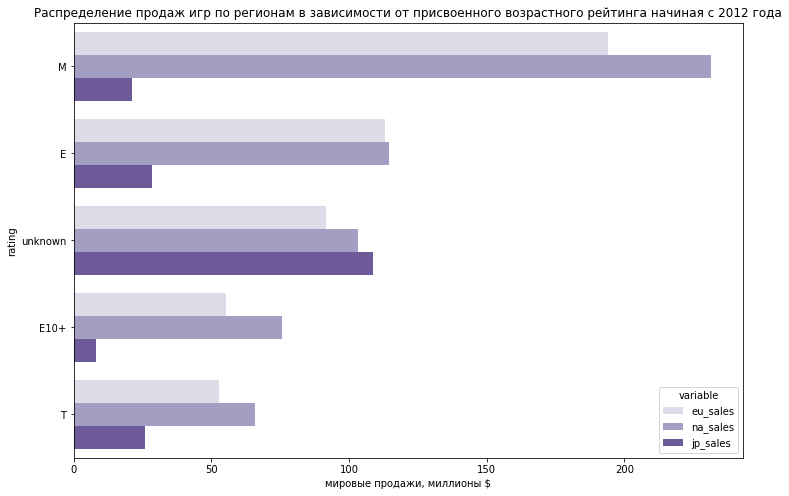

In [34]:
# получаем необходимый срез данных
df_4_rating = df_4[['rating', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('rating', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['rating']) \
    .sort_values('value', ascending=False)


# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=df_4_rating.rating,
                 x=df_4_rating.value,
                 orient='h',
                 palette='Purples',
                 hue=df_4_rating.variable,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

# подписи осей и названия
plt.xlabel('мировые продажи, миллионы $')
plt.title('Распределение продаж игр по регионам в зависимости от присвоенного возрастного рейтинга начиная с 2012 года');

# 5 Исследование статистических показателей

Распределение средней оценки по жанрам среди пользователей и критиков

In [35]:
# получаем необходимый срез данных, приведя critic_score к размерности user_score делением на 10
df_5 = df_4.assign(critic_score= lambda x: x.critic_score / 10) \
    .groupby('genre', as_index=False)\
    .agg({'critic_score': 'mean', 'user_score': 'mean'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

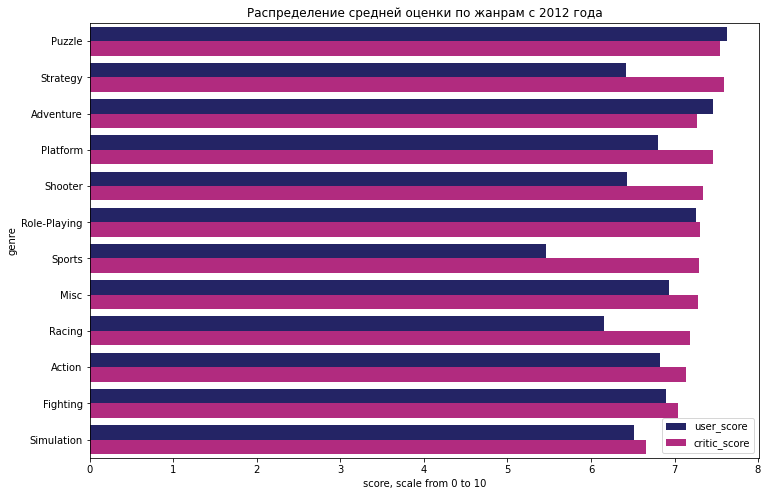

In [36]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=df_5.genre,
                 x=df_5.value,
                 orient='h',
                 color='#6925c2',
                 palette=['#191970', '#C71585'],
                 hue=df_5.variable);

# подписи осей и названия
ax.legend(loc = 'best')
plt.xlabel('score, scale from 0 to 10')
plt.title('Распределение средней оценки по жанрам с 2012 года');

Форма распределения оценок критиков и пользователей

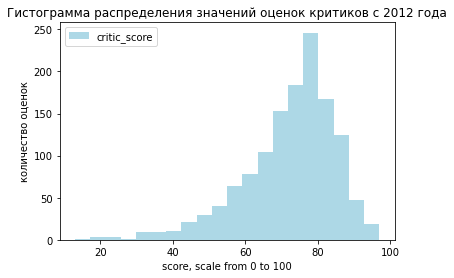

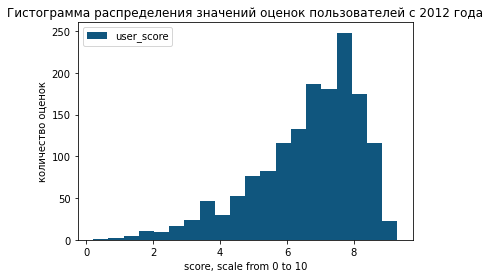

In [37]:
# построение гистограммы для оценок критиков
df_4.plot(y='critic_score',
          kind='hist',
          bins=20,
          color='#ADD8E6')

# подписи осей и названия
plt.legend(loc = 'upper left')
plt.xlabel('score, scale from 0 to 100')
plt.ylabel('количество оценок')
plt.title('Гистограмма распределения значений оценок критиков с 2012 года');

# построение гистограммы для оценок пользователей
df_4.plot(y='user_score',
          kind='hist',
          bins=20,
          color='#10567E')

# подписи осей и названия
plt.legend(loc = 'best')
plt.xlabel('score, scale from 0 to 10')
plt.ylabel('количество оценок')
plt.title('Гистограмма распределения значений оценок пользователей с 2012 года');

Распределения основных статистик оценок критиков и пользователей (среднее, дисперсия, стандартное отклонение).

In [38]:
# подсчет статистик
# зеленым подсвечены максимальные значения по каждому столбцу
# красным подсвечены минимальные значения по каждому столбцу
df_5_wide = df_4.assign(critic_score= lambda x: x.critic_score / 10) \
    .groupby('genre', as_index=False)\
    .agg({'critic_score': ['mean', 'var', 'std'],
          'user_score': ['mean', 'var', 'std']}) \
    .style.highlight_min(axis=0, color='#FFC3C2') \
    .highlight_max(axis=0, color='#D8ECC1')

df_5_wide